#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the dataset.

In [2]:
df=pd.read_csv("registered_companies.csv")

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Taking a look at the dataset and for number of rows, column, what are the columns.

In [3]:
df

CORPORATE_IDENTIFICATION_NUMBER  \
0                                F01450   
1                                F01518   
2                                F01573   
3                                F01802   
4                                F01818   
...                                 ...   
1992165           U51109NL2000PTC006232   
1992166           U51109NL2000PTC006233   
1992167           U51109NL2000PTC006259   
1992168           U74950NL1998PTC005463   
1992169           U74990NL2016PTC008397   

                                              COMPANY_NAME COMPANY_STATUS  \
0                                NIKO RESOURCES LIMITED              ACTV   
1                      WORLDWIDE RESOURCES HOLDINGS LTD              ACTV   
2                        ATWOOD OCEANIC PACIFIC LIMITED              ACTV   
3                                    SOLVAY S A BELGIUM              NAEF   
4                          TATE AND LYLE INDUSTRIES LTD              ACTV   
...                                                    ...            ...   
1992165  SCIENTIFIC ADVANCE INSTRUMENTS & EQUIPMENTS CO...           STOF   
1992166  SUNSHINE INSTRUMENTS & EQUIPMENTS COMPANY PRIV...           STOF   
1992167  STERN (INDIA) PLANTATION & MARKETING PRIVATE L...           STOF   
1992168            T.A. NGULLIE FRUIT PRODUCTS PVT LTD.              STOF   
1992169                       NAGA MART PRIVATE LIMITED              ACTV   

        COMPANY_CLASS           COMPANY_CATEGORY COMPANY_SUB_CATEGORY  \
0                 NaN                        NaN                  NaN   
1                 NaN                        NaN                  NaN   
2                 NaN                        NaN                  NaN   
3                 NaN                        NaN                  NaN   
4                 NaN                        NaN                  NaN   
...               ...                        ...                  ...   
1992165       Private  Company limited by Shares     Non-govt company   
1992166       Private  Company limited by Shares     Non-govt company   
1992167       Private  Company limited by Shares     Non-govt company   
1992168       Private  Company limited by Shares     Non-govt company   
1992169       Private  Company limited by Shares     Non-govt company   

        DATE_OF_REGISTRATION REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
0                        NaN          Gujarat             0.0             0.0   
1                 16-07-1998          Gujarat             0.0             0.0   
2                        NaN          Gujarat             0.0             0.0   
3                 25-06-2001          Gujarat             0.0             0.0   
4                 25-07-2001          Gujarat             0.0             0.0   
...                      ...              ...             ...             ...   
1992165           30-06-2000         Nagaland       1000000.0         20000.0   
1992166           30-06-2000         Nagaland       1000000.0        200000.0   
1992167           25-07-2000         Nagaland        200000.0          3000.0   
1992168           09-07-1998         Nagaland       2500000.0             0.0   
1992169           29-02-2016         Nagaland        500000.0        100000.0   

        INDUSTRIAL_CLASS             PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                    NaN                               Agriculture & allied   
1                    NaN                               Agriculture & allied   
2                    NaN                               Agriculture & allied   
3                    NaN                               Agriculture & allied   
4                    NaN                               Agriculture & allied   
...                  ...                                                ...   
1992165          51109.0  Wholesale and retail trade repair of motor veh...   
1992166          51109.0  Wholesale and retail trade repair of motor veh...   
19921

In [4]:
df.shape

(1992170, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         object 
 1   COMPANY_NAME                            object 
 2   COMPANY_STATUS                          object 
 3   COMPANY_CLASS                           object 
 4   COMPANY_CATEGORY                        object 
 5   COMPANY_SUB_CATEGORY                    object 
 6   DATE_OF_REGISTRATION                    object 
 7   REGISTERED_STATE                        object 
 8   AUTHORIZED_CAP                          float64
 9   PAIDUP_CAPITAL                          float64
 10  INDUSTRIAL_CLASS                        object 
 11  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 12  REGISTERED_OFFICE_ADDRESS               object 
 13  REGISTRAR_OF_COMPANIES                  object 
 14  EMAIL_ADDR                        

In [6]:
df.describe().transpose()

count          mean           std  min       25%  \
AUTHORIZED_CAP  1992170.0  4.238508e+07  2.960562e+09  0.0  100000.0   
PAIDUP_CAPITAL  1992170.0  2.434621e+07  2.313154e+09  0.0  100000.0   

                     50%        75%           max  
AUTHORIZED_CAP  500000.0  1500000.0  1.850000e+12  
PAIDUP_CAPITAL  100000.0   502000.0  1.699613e+12

#### From the above description of the data we found out that two column are integer type rest of them currently seems object data type.Lets perform further analysis.

## Data Cleaning


In [7]:
## sn
df.drop(['LATEST_YEAR_FINANCIAL_STATEMENT','EMAIL_ADDR','CORPORATE_IDENTIFICATION_NUMBER','INDUSTRIAL_CLASS'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 13 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   COMPANY_NAME                            object 
 1   COMPANY_STATUS                          object 
 2   COMPANY_CLASS                           object 
 3   COMPANY_CATEGORY                        object 
 4   COMPANY_SUB_CATEGORY                    object 
 5   DATE_OF_REGISTRATION                    object 
 6   REGISTERED_STATE                        object 
 7   AUTHORIZED_CAP                          float64
 8   PAIDUP_CAPITAL                          float64
 9   PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 10  REGISTERED_OFFICE_ADDRESS               object 
 11  REGISTRAR_OF_COMPANIES                  object 
 12  LATEST_YEAR_ANNUAL_RETURN               object 
dtypes: float64(2), object(11)
memory usage: 197.6+ MB


In [9]:
# Cleaning COMPANY_CATEGORY
df['COMPANY_CATEGORY'].value_counts()

Company limited by Shares       1963899
Company Limited by Guarantee      22219
Unlimited Company                   967
Name: COMPANY_CATEGORY, dtype: int64

In [10]:
# Checking for null values
df['COMPANY_CATEGORY'].isnull().sum()

5085

In [11]:
# As the chances of a company being limited by Shares is more therefore filling these null values with it.
df['COMPANY_CATEGORY'].fillna("Company limited by Shares",inplace = True)


In [12]:
## Checking for null values
df['COMPANY_CATEGORY'].isnull().sum()

0

In [13]:
# Cleaning COMPANY_CLASS
df['COMPANY_CLASS'].value_counts()

Private                        1819264
Public                          137612
Private(One Person Company)      30216
Name: COMPANY_CLASS, dtype: int64

In [14]:
# Checking for null values
df['COMPANY_CLASS'].isnull().sum()

5078

In [15]:
# As the chances of a company being private is more therefore filling these null values with it.
df['COMPANY_CLASS'].fillna("Private",inplace = True)

In [16]:
## Checking for null values
df['COMPANY_CLASS'].isnull().sum()

0

In [17]:
## Changing Private(One Person Company) to solo.
df["COMPANY_CLASS"] = df["COMPANY_CLASS"].apply(lambda x:"Solo" if x == 'Private(One Person Company)' else x)

In [18]:
## Checking the cleaned column COMPANY_CLASS 
df["COMPANY_CLASS"].unique()

array(['Private', 'Public', 'Solo'], dtype=object)

In [19]:
## Cleaning PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN 
## Checking null values
df["PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"].isnull().sum()


12

In [20]:
## Filling null value by indentifying  mode of the data.
df["PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"].value_counts()

Real estate renting and business activities                                                                       679955
Manufacturing                                                                                                     410402
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods                  227333
Construction                                                                                                      162125
Financial intermediation                                                                                          120714
Agriculture & allied                                                                                               82572
Transport storage and communications                                                                               63738
Other community social and personal service activities                                                             59282
Extraterritorial organizations a

In [21]:
df["PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"].fillna("Real estate renting and business activities",inplace=True)

In [22]:
# Checking if null values are removed
df["PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"].isnull().sum()

0

In [23]:
## Creating new column name PRINCIPAL_BUSINESS
df["PRINCIPAL_BUSINESS"] = df["PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"].apply(lambda x:x.split(" ")[0])
print(df["PRINCIPAL_BUSINESS"].unique())

['Agriculture' 'Mining' 'Manufacturing' 'Electricity' 'Construction'
 'Wholesale' 'Unclassified' 'Hotels' 'Transport' 'Financial' 'Real'
 'Education' 'Health' 'Other' 'Extraterritorial' 'Activities' 'Public']


In [24]:
# Starting with DATE_OF_REGISTRATION
df['DATE_OF_REGISTRATION']

0                 NaN
1          16-07-1998
2                 NaN
3          25-06-2001
4          25-07-2001
              ...    
1992165    30-06-2000
1992166    30-06-2000
1992167    25-07-2000
1992168    09-07-1998
1992169    29-02-2016
Name: DATE_OF_REGISTRATION, Length: 1992170, dtype: object

In [25]:
# Checking for null values in this column
df['DATE_OF_REGISTRATION'].isnull().sum()

2525

In [26]:
df['DATE_OF_REGISTRATION'].fillna(0)

0                   0
1          16-07-1998
2                   0
3          25-06-2001
4          25-07-2001
              ...    
1992165    30-06-2000
1992166    30-06-2000
1992167    25-07-2000
1992168    09-07-1998
1992169    29-02-2016
Name: DATE_OF_REGISTRATION, Length: 1992170, dtype: object

In [27]:
df['DATE_OF_REGISTRATION']

0                 NaN
1          16-07-1998
2                 NaN
3          25-06-2001
4          25-07-2001
              ...    
1992165    30-06-2000
1992166    30-06-2000
1992167    25-07-2000
1992168    09-07-1998
1992169    29-02-2016
Name: DATE_OF_REGISTRATION, Length: 1992170, dtype: object

In [28]:
# Since we cannot fill these null values with any other values we drop them.
df['DATE_OF_REGISTRATION'].dropna()

1          16-07-1998
3          25-06-2001
4          25-07-2001
5          08-10-2001
6          31-12-2001
              ...    
1992165    30-06-2000
1992166    30-06-2000
1992167    25-07-2000
1992168    09-07-1998
1992169    29-02-2016
Name: DATE_OF_REGISTRATION, Length: 1989645, dtype: object

In [31]:
# Changing Date_of_registration from object to datetime format.
df["DATE_OF_REGISTRATION"] = df["DATE_OF_REGISTRATION"].apply(pd.to_datetime)

In [32]:
df['DATE_OF_REGISTRATION']

70        1991-06-21
71        1994-01-17
72        1994-02-23
73        1996-04-15
74        2011-12-27
             ...    
1992152   2016-03-11
1992153   2013-09-18
1992155   2012-08-28
1992156   2013-09-18
1992169   2016-02-29
Name: DATE_OF_REGISTRATION, Length: 1136046, dtype: datetime64[ns]

In [33]:
## Creating separate column for Registration year and month
df['REG_YEAR'] = df['DATE_OF_REGISTRATION'].dt.year
df['REG_MONTH'] = df['DATE_OF_REGISTRATION'].dt.month

In [34]:
## Cleaning REGISTRAR_OF_COMPANIES
df["REGISTRAR_OF_COMPANIES"].isnull().sum()

0

In [35]:
df["REGISTRAR_OF_COMPANIES"].count()

1136046

In [36]:
## Dropping  the values as incorrect data can not be filled
df["REGISTRAR_OF_COMPANIES"].dropna(inplace= True)

In [37]:
## Making a new column name REGISTRAR.
df["REGISTRAR"] = df["REGISTRAR_OF_COMPANIES"].apply(lambda x:x.split("ROC\xa0")[-1])
print(df["REGISTRAR"].unique())

['AHMEDABAD' 'GOA' 'BANGALORE' 'JAIPUR' 'KOLKATA' 'GWALIOR' 'UTTARAKHAND'
 'KANPUR' 'SHILLONG' 'JHARKHAND' 'PATNA' 'COIMBATORE' 'CHENNAI'
 'HYDERABAD' 'DELHI' 'MUMBAI' 'PUNE' 'ERNAKULAM' 'CHHATTISGARH' 'HP'
 'PONDICHERRY' 'JAMMU' 'CUTTAK' 'CHANDIGARH' 'ANDAMAN']


In [38]:
## Cleaning Company Status 
df['COMPANY_STATUS'].isnull().sum()
## There are no null values.

0

In [39]:
## Cleaning Registered State
df['REGISTERED_STATE'].isnull().sum()
## There are no null values.

0

In [40]:
## Changing State name to state codes
state_codes = {'Gujarat': "GJ", 'Karnataka': 'KA', 'Rajasthan':'RJ', 'Madhya Pradesh':'MP',
       'Uttaranchal':'UK', 'Assam':'AS', 'Jharkhand':'JH', 'Tamil Nadu':'TN', 'Delhi':'DL',
       'Maharashtra':'MH', 'Haryana':'HR', 'Chattisgarh':'CG', 'Daman and Diu':'DD',
       'West Bengal':'WB', 'Lakshadweep':'LD', 'Himachal Pradesh':'HP',
       'Dadra and Nagra Haveli':'DH', 'Kerala':'KL', 'Pondicherry':'PY',
       'Jammu and Kashmir':'JK', 'Bihar':'BR', 'Andhra Pradesh':'AP',
       'Arunachal Pradesh':'AR', 'Uttar Pradesh':'UP', 'Telangana':'TS', 'Chandigarh':'CH',
       'Punjab':'PB', 'Orissa':'OR', 'Goa':'GA', 'Meghalaya':'ML', 'Tripura':'TR', 'Sikkim':'SK',
       'Mizoram':'MZ', 'Manipur':'MN', 'Andaman and Nicobar Islands':'AN', 'Nagaland':'NL'}
df.replace({'REGISTERED_STATE':state_codes}, inplace=True)

In [41]:
df['REGISTERED_STATE'].unique()

array(['GJ', 'KA', 'RJ', 'MP', 'UK', 'AS', 'JH', 'TN', 'DL', 'MH', 'HR',
       'CG', 'DD', 'WB', 'LD', 'HP', 'DH', 'KL', 'PY', 'JK', 'BR', 'AP',
       'AR', 'UP', 'TS', 'CH', 'PB', 'OR', 'GA', 'ML', 'TR', 'SK', 'MZ',
       'MN', 'AN', 'NL'], dtype=object)

In [29]:
### Creating two new dataframes with null values in one column and non null in another for data security.
na_free = df.dropna()
only_na = df[~df.index.isin(na_free.index)]

In [30]:
### Dropping all null values.
df.dropna(inplace=True)

# Data Visualization

## States with most number of registered companies

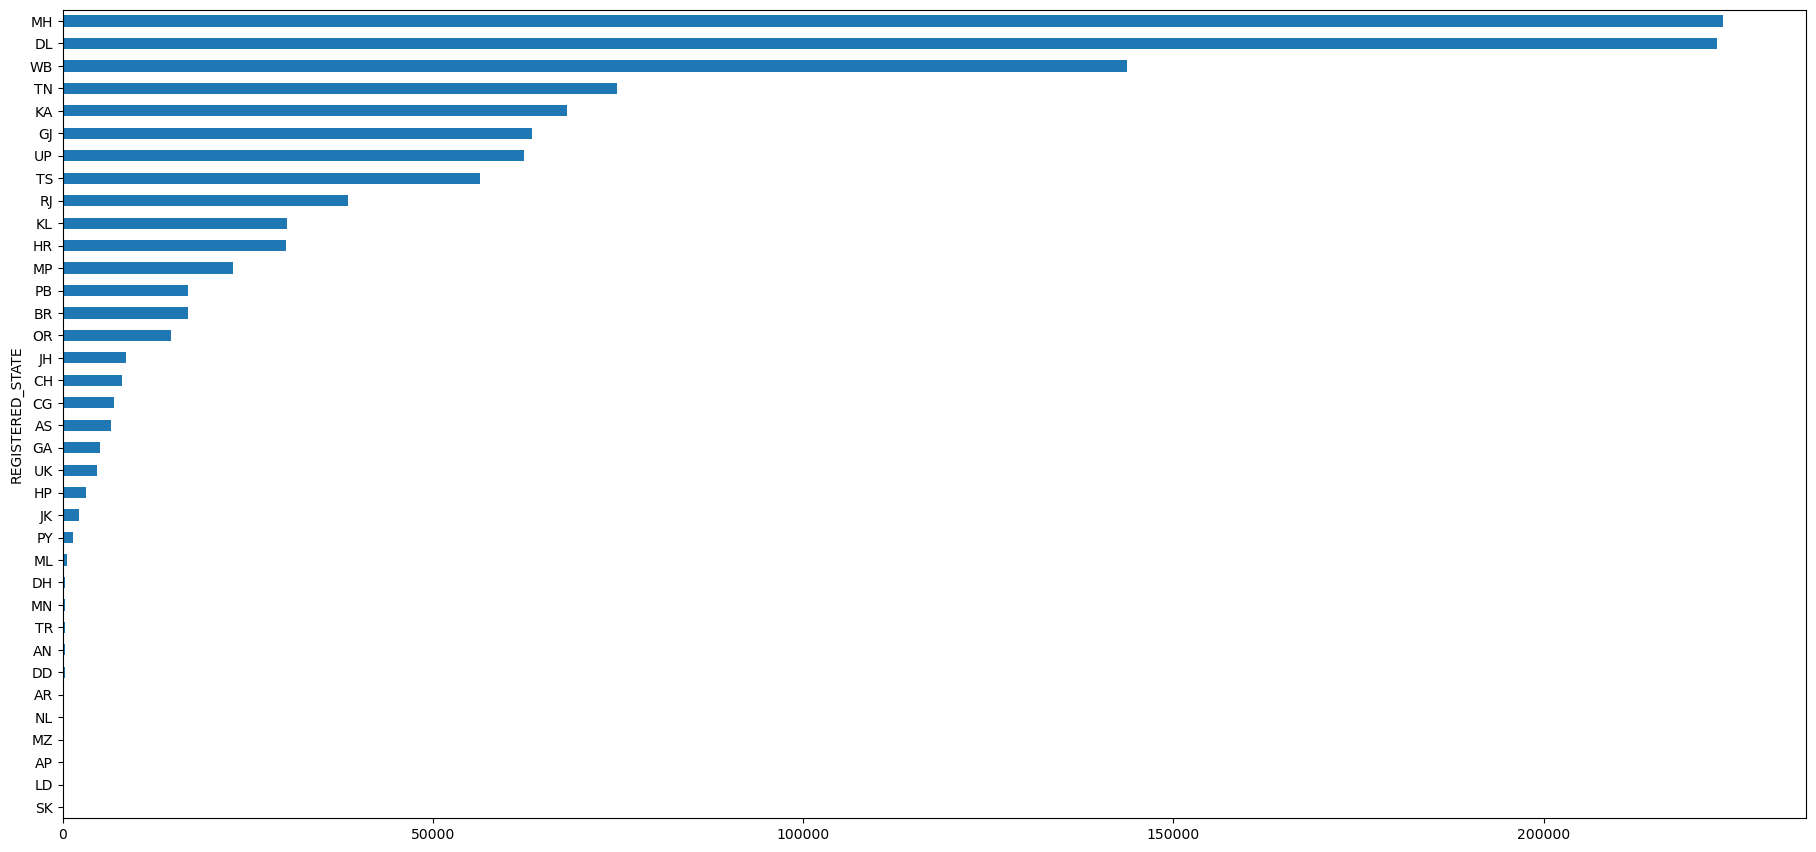

In [43]:
fig = plt.gcf()
fig.set_size_inches(22.5, 10.5)
states_wise_companies = df.groupby(['REGISTERED_STATE']).COMPANY_STATUS.count().sort_values(ascending=False)
states_wise_companies.plot(kind='barh').invert_yaxis()

## Principal Business In top 6 states in past 10 years

In [44]:
df['REGISTERED_STATE'].value_counts()

MH    224279
DL    223439
WB    143762
TN     74808
KA     68134
GJ     63324
UP     62284
TS     56414
RJ     38586
KL     30244
HR     30134
MP     23049
PB     16937
BR     16912
OR     14582
JH      8580
CH      7968
CG      6894
AS      6536
GA      5024
UK      4692
HP      3200
JK      2212
PY      1379
ML       616
DH       359
MN       357
TR       294
AN       260
DD       251
AR       233
NL       206
MZ        53
AP        33
LD        10
SK         1
Name: REGISTERED_STATE, dtype: int64

In [45]:
states = ['MH', 'DL', 'WB', 'KA', 'TN', 'GJ', 'UP']
years = [2020, 2019, 2018, 2017, 2015, 2014, 2013, 2012, 2011, 2010]

In [46]:
search = df.loc [df['REGISTERED_STATE'].isin(states) & df['REG_YEAR'].isin(years) & df['COMPANY_STATUS'].str.contains("ACTV",case=False)]


PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
Activities of private households as employers and undifferentiated production activities of private households        49
Agriculture & allied                                                                                                7302
Construction                                                                                                       23018
Education                                                                                                           5503
Electricity gas and water supply                                                                                    4073
Extraterritorial organizations and bodies                                                                             10
Financial intermediation                                                                                            6632
Health and social work                                                                                            

<AxesSubplot:ylabel='None'>

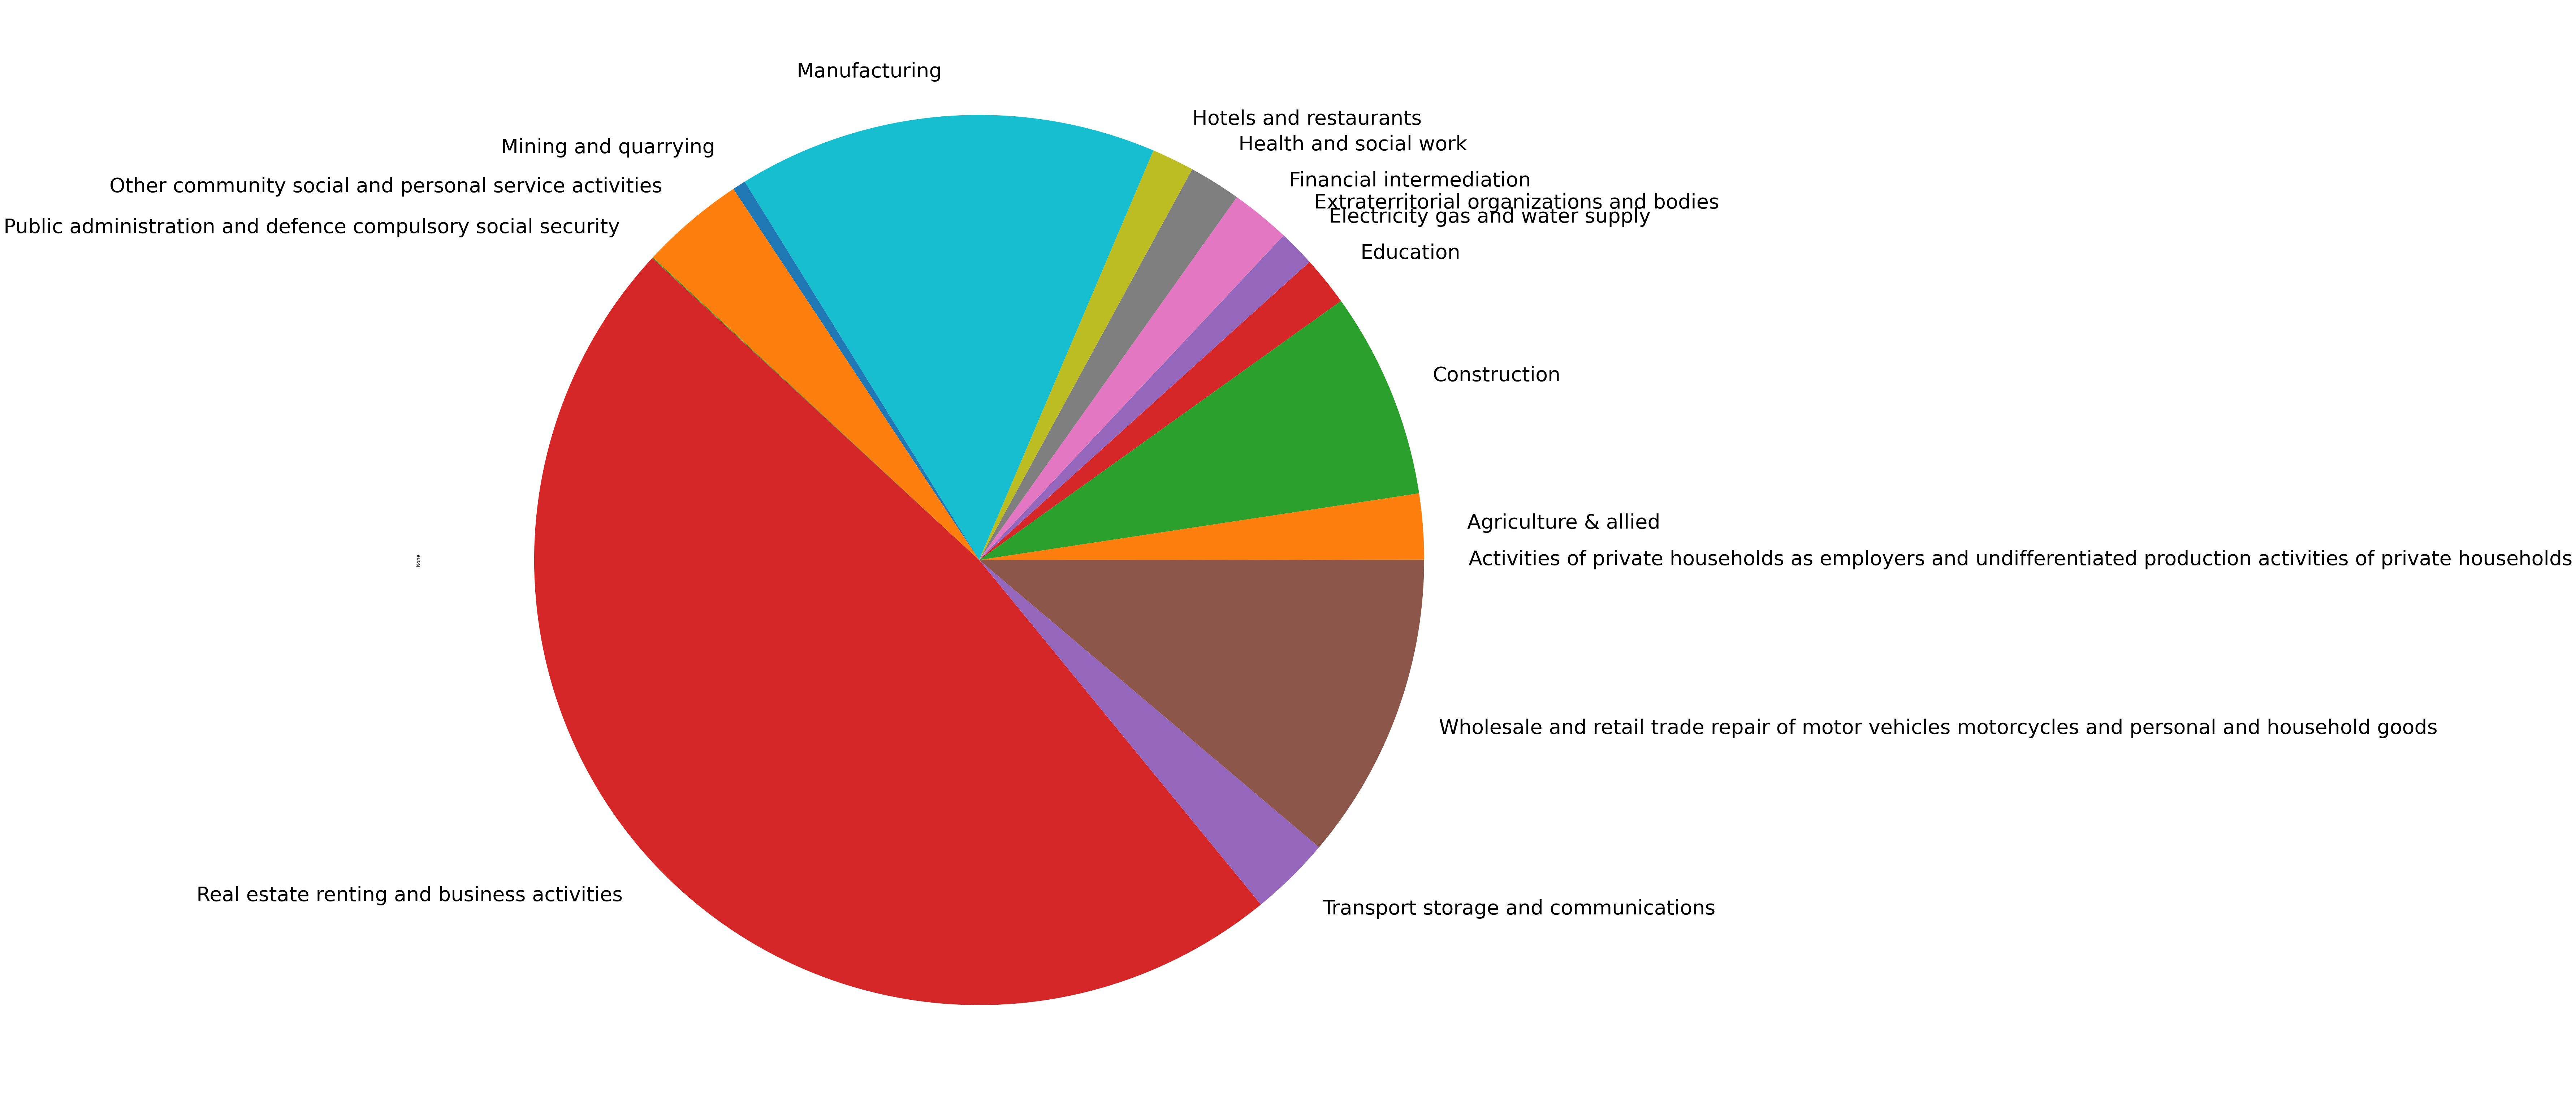

In [47]:
## plot graph
group = search.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')
print(group.size())
group.size().plot.pie(y='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', figsize=(40,40), fontsize=40)

## Distribution  of Company class.

In [44]:
ind2= df.COMPANY_CLASS.value_counts().index
company_current_class = df.groupby("COMPANY_CLASS").size().reset_index(name='NO_OF_COMPANIES')

In [45]:
fig = px.pie(company_current_class, values='NO_OF_COMPANIES', names='COMPANY_CLASS', title='Companies Class', hole=.5)
fig.show()

## Number of Registered Companies each year in grouped by Principal Business wise.

In [76]:
table = search.groupby('REG_YEAR')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().unstack().fillna(0)

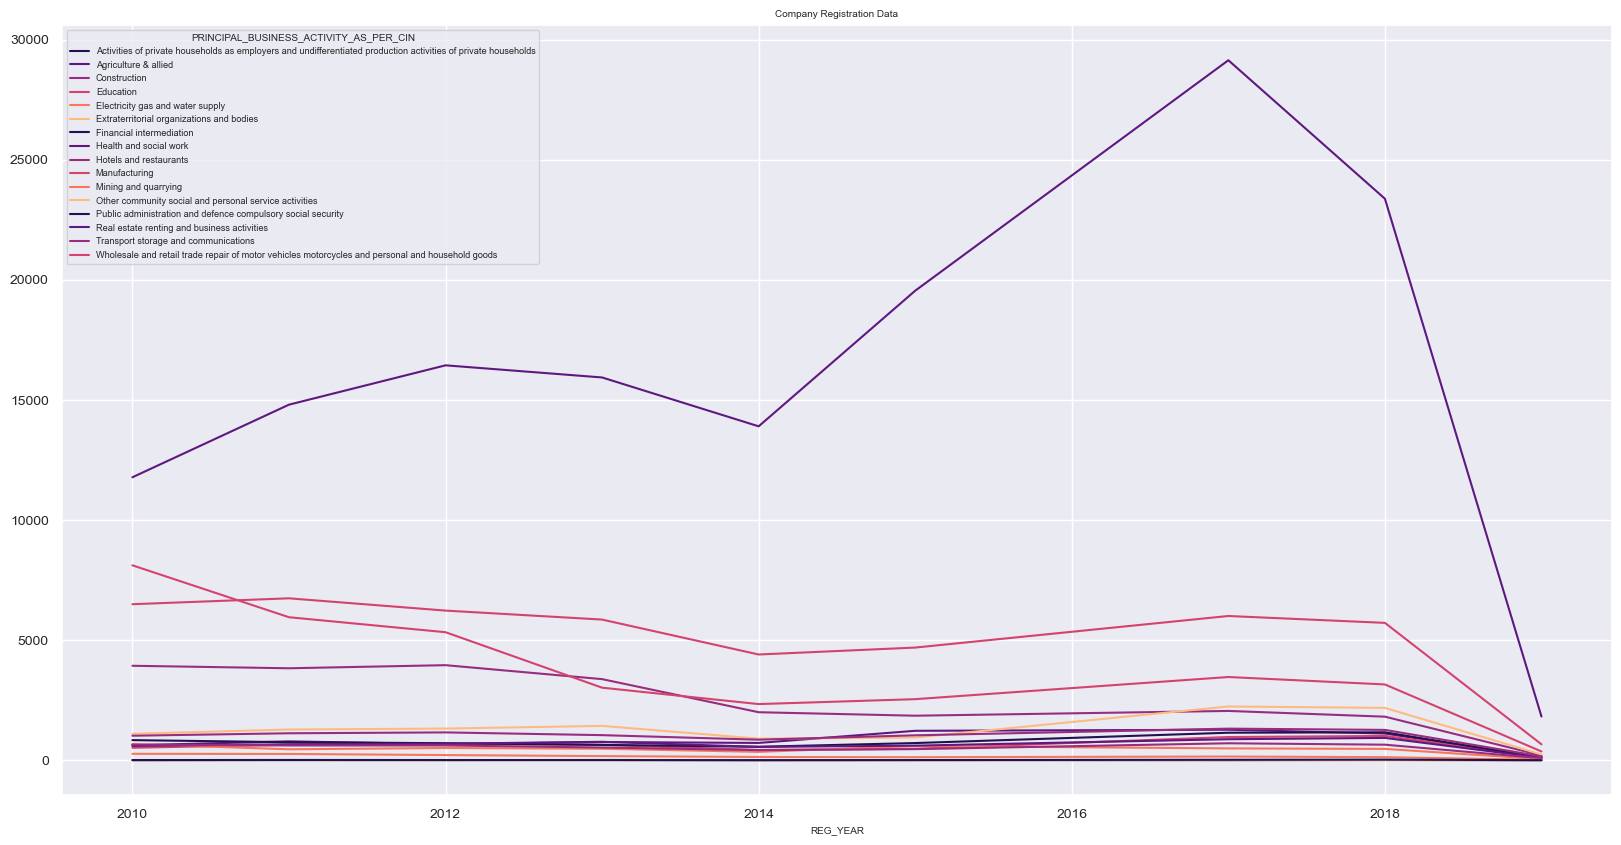

In [77]:
plotting = table.plot.line(figsize=(20,10), fontsize=10, title="Company Registration Data", legend=True)

In [43]:
import plotly.express as px
import plotly.graph_objs as go

In [46]:
companies_state = df.groupby("REGISTERED_STATE").size().reset_index(name='NO_OF_COMPANIES')

In [47]:
ladakh = pd.DataFrame([["Ladakh", 0.0]], columns=companies_state.columns)
companies_state = companies_state.append(ladakh, ignore_index=True)
indianStates=["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Delhi","Puducherry"]

In [48]:
fig = px.choropleth(
    companies_state,
    geojson=indianStates,
    featureidkey='properties.ST_NM',
    locations='REGISTERED_STATE',
    color_continuous_scale="Oranges",
    color='NO_OF_COMPANIES',
    title='Number of companies state-wise'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

## Current Status Of companies

In [49]:
company_current_status = df.groupby("COMPANY_STATUS").size().reset_index(name='NO_OF_COMPANIES')

In [50]:
status_description = {"ACTV": "Active",
          "NAEF": "Not available for e-filing",
          "ULQD": "Under liquidation",
          "AMAL": "Amalgamated",
          "STOF": "Strike off",
          "DISD": "Dissolved",
          "CLLD": "Converted to LLP and Dissolved",
          "UPSO": "Under process of Striking Off",
          "CLLP": "Converted to LLP",
          "LIQD": "Liquidated",
          "DRMT": "Dormant",
          "MLIQ": "Vanished",
          "D455": "Dormant under section 455"
         }

In [51]:
company_current_status.COMPANY_STATUS = company_current_status.COMPANY_STATUS.replace(status_description)

In [52]:
fig = px.pie(company_current_status, values='NO_OF_COMPANIES', names='COMPANY_STATUS', title='Companies Current Status', hole=.5)
fig.show()

## Number of Registration over the years.

In [53]:
number_of_registration = df.copy()
number_of_registration = number_of_registration[['DATE_OF_REGISTRATION']]

In [54]:
number_of_registration['YEAR_OF_REGISTRATION'] = df['REG_YEAR']
number_of_registration = number_of_registration.groupby("YEAR_OF_REGISTRATION").size().reset_index(name='NO_OF_COMPANIES')

In [55]:
fig = px.bar(number_of_registration, x='YEAR_OF_REGISTRATION', y='NO_OF_COMPANIES', title='Number of registrations over the years')
fig.show()

## Top 20 companies with highest Authorized Capital and its Paidup Capital (INR)

In [56]:
highest_auth_capital_companies = df.sort_values(by='AUTHORIZED_CAP', ascending=False)[0:20]

In [57]:
fig = go.Figure()
fig.add_trace(go.Bar(y=highest_auth_capital_companies['COMPANY_NAME'],
                     x=highest_auth_capital_companies['AUTHORIZED_CAP'],
                     text=highest_auth_capital_companies['AUTHORIZED_CAP'],
                     name="Authorized Capital (INR)",
                    orientation='h'))
fig.add_trace(go.Bar(y=highest_auth_capital_companies['COMPANY_NAME'],
                     x=highest_auth_capital_companies['PAIDUP_CAPITAL'],
                     text=highest_auth_capital_companies['PAIDUP_CAPITAL'],
                     name="Paid Up Capital (INR)",
                    orientation='h'))

fig.update_layout(
    autosize=False,
    width=900,
    height=800,
    barmode='group',
    bargap=0.1,
    font=dict(size=8))
fig.update_traces(textposition='outside')
fig.show()

## Principal Business Activity of a company as per CIN¶

In [58]:
company_business_activity = df.groupby("PRINCIPAL_BUSINESS").size().reset_index(name='NO_OF_COMPANIES')
fig = px.pie(company_business_activity, values='NO_OF_COMPANIES', names='PRINCIPAL_BUSINESS', title='Principal Business Activity of a company as per CIN (Hover to see the data)', hole=.5)
fig.update_layout(showlegend=False)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

In [62]:
import seaborn as sns

In [63]:
#Creating bins for REGISTRATION_YEAR

df["REG_YEAR_5BIN"] = df["REG_YEAR"].apply(lambda x:(round(x/5))*5)
print(df["REG_YEAR_5BIN"].unique())

df["REG_YEAR_10BIN"] = df["REG_YEAR"].apply(lambda x:(round(x/10))*10)
print(df["REG_YEAR_10BIN"].unique())
      
df["REG_YEAR_20BIN"] = df["REG_YEAR"].apply(lambda x:(round(x/20))*20)
print(df["REG_YEAR_20BIN"].unique())

[1990 1995 2010 2005 2015 1980 1985 1965 1970 1955 1915 1920 1930 1935
 1950 1960 1975 2000 1945 1940 2020 1905 1910 1890 1895 1900 1925 1880
 1875 1885 1870 1865]
[1990 2000 2010 1980 1960 1970 1910 1920 1930 1940 1950 2020 1900 1890
 1880 1870 1860]
[2000 2020 1980 1960 1920 1940 1900 1880 1860]


In [64]:
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='magma',
              font='sans-serif',
              font_scale=0.6,

              color_codes=True,
              rc=None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1865'),
  Text(1, 0, '1870'),
  Text(2, 0, '1875'),
  Text(3, 0, '1880'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1895'),
  Text(7, 0, '1900'),
  Text(8, 0, '1905'),
  Text(9, 0, '1910'),
  Text(10, 0, '1915'),
  Text(11, 0, '1920'),
  Text(12, 0, '1925'),
  Text(13, 0, '1930'),
  Text(14, 0, '1935'),
  Text(15, 0, '1940'),
  Text(16, 0, '1945'),
  Text(17, 0, '1950'),
  Text(18, 0, '1955'),
  Text(19, 0, '1960'),
  Text(20, 0, '1965'),
  Text(21, 0, '1970'),
  Text(22, 0, '1975'),
  Text(23, 0, '1980'),
  Text(24, 0, '1985'),
  Text(25, 0, '1990'),
  Text(26, 0, '1995'),
  Text(27, 0, '2000'),
  Text(28, 0, '2005'),
  Text(29, 0, '2010'),
  Text(30, 0, '2015'),
  Text(31, 0, '2020')])

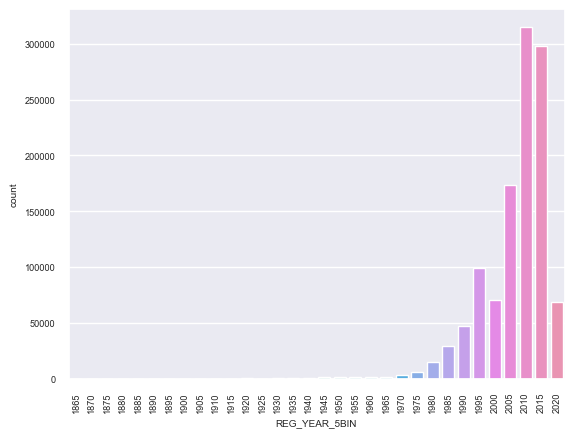

In [65]:
#Counting all the number fo companies by REG_YEAR

sns.countplot(x="REG_YEAR_5BIN",data=df)
plt.xticks(rotation=90)


## Taking a sample of 10000 data for better visualization

In [66]:
df_sample = df.sample(n=10000)

<AxesSubplot:xlabel='REG_YEAR', ylabel='COMPANY_CLASS'>

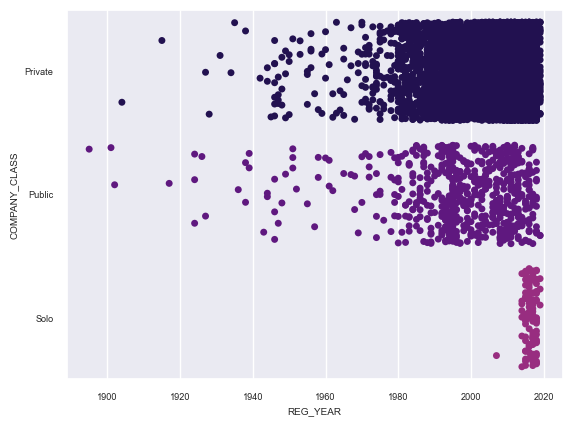

In [67]:
sns.stripplot(x="REG_YEAR",
              y="COMPANY_CLASS",
              data=df_sample, jitter=0.4,
            )

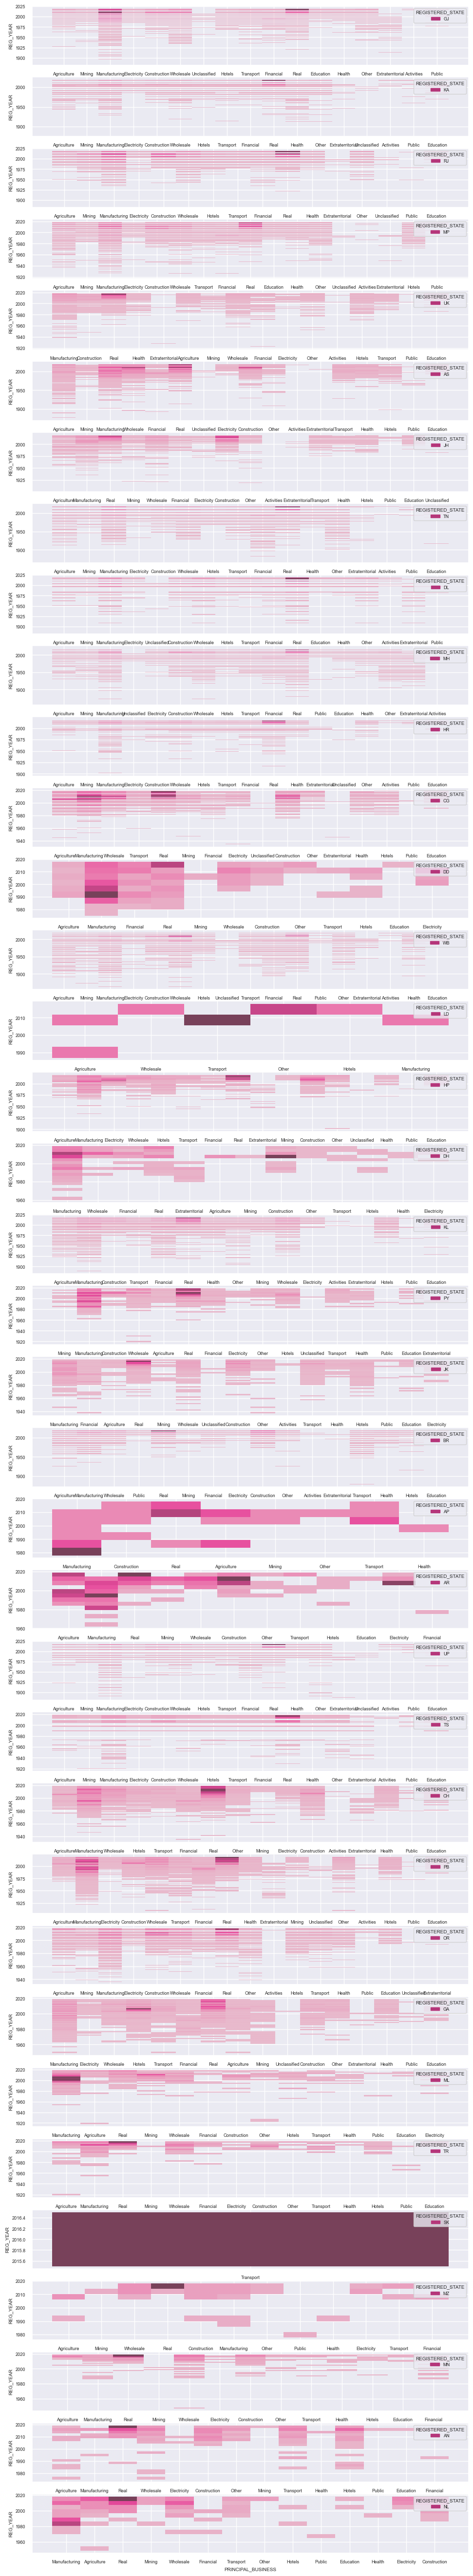

In [68]:
y=0; f, ax = plt.subplots(len(df["REGISTERED_STATE"].unique()),1)
f.subplots_adjust(top=10, bottom=-0.9, left=-0.5, hspace=0.2)
for x in df["REGISTERED_STATE"].unique():
    sns.histplot(y='REG_YEAR',
                  x='PRINCIPAL_BUSINESS',
                  #jitter=0.3,
                  hue="REGISTERED_STATE",
                  palette="magma_r",
                  data= df[df["REGISTERED_STATE"]==x],
                  ax=ax[y])
    y+=1

In [69]:
state= 'MH'

In [70]:
state_details=df[['COMPANY_SUB_CATEGORY','PRINCIPAL_BUSINESS','REG_YEAR']][df['REGISTERED_STATE']==state]

In [71]:
state_details = state_details.groupby(by=['REG_YEAR','PRINCIPAL_BUSINESS']).size().reset_index(name='count')

<AxesSubplot:xlabel='REG_YEAR', ylabel='count'>

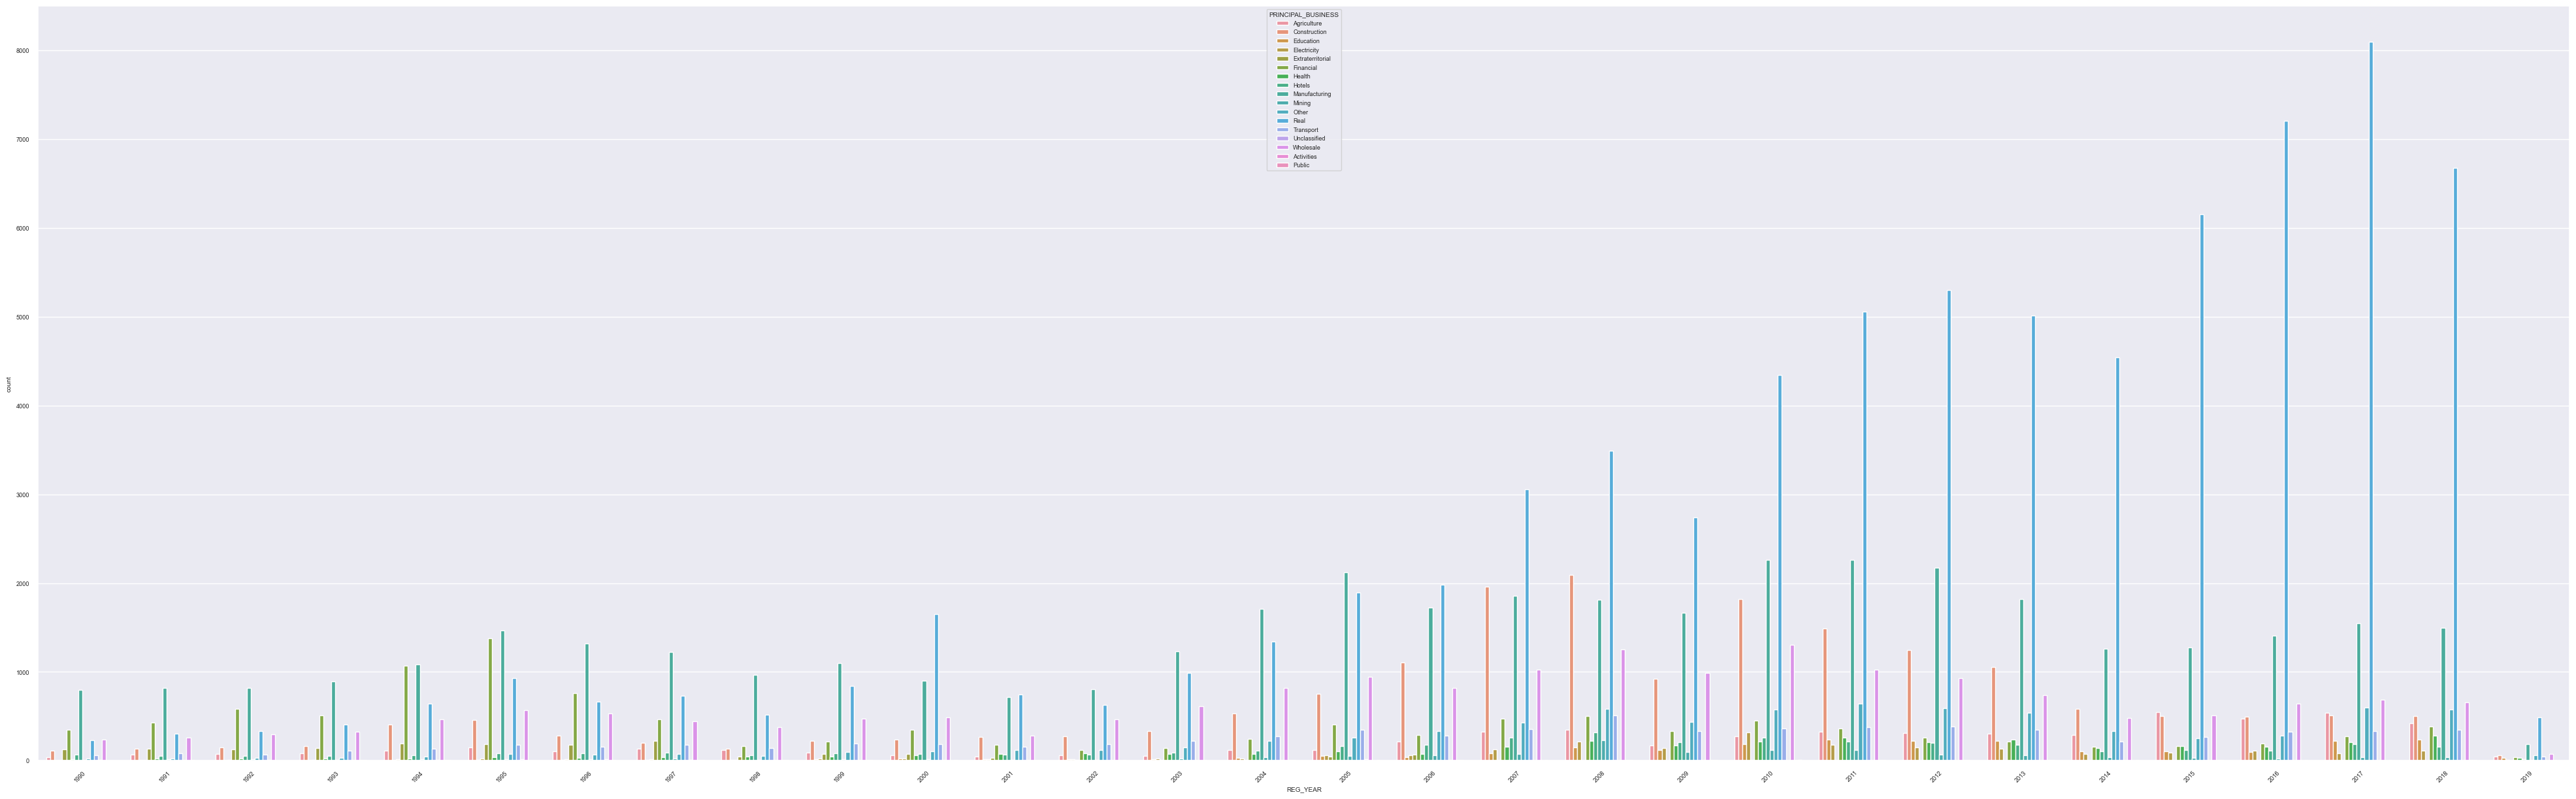

In [72]:
plt.figure(figsize=(50,15))
plt.xticks(rotation=45)
sns.color_palette("hls", 8)
sns.barplot(data=state_details[state_details['REG_YEAR']>=1990],x='REG_YEAR',y='count',hue='PRINCIPAL_BUSINESS')

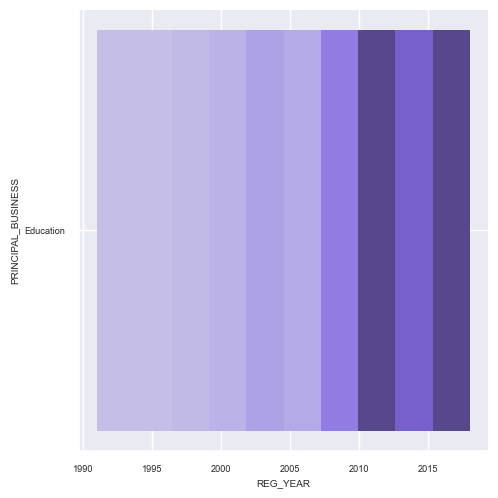

In [73]:
sns.displot(x="REG_YEAR", y="PRINCIPAL_BUSINESS", data=df_sample[df_sample["PRINCIPAL_BUSINESS"] == "Education"])

<AxesSubplot:xlabel='REG_YEAR', ylabel='COMPANY_CLASS'>

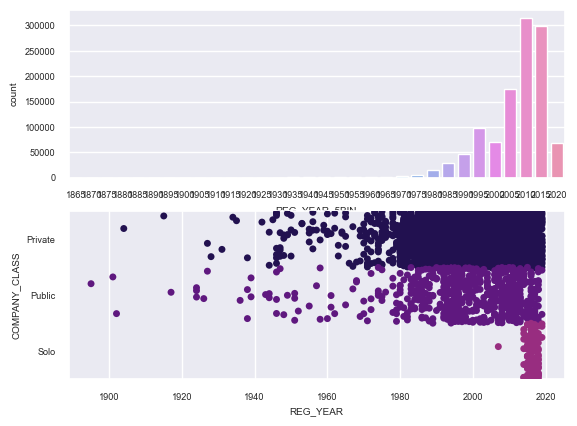

In [74]:
f, ax = plt.subplots(2)
#Counting all the number fo companies by REG_YEAR

sns.countplot(x="REG_YEAR_5BIN",
              data=df, ax = ax[0])

#Year of registration by COMPANY_CLASS

sns.stripplot(x="REG_YEAR",
              y="COMPANY_CLASS",
              data=df_sample, jitter=0.5,
              ax = ax[1])

['Public' 'Private' 'Solo']


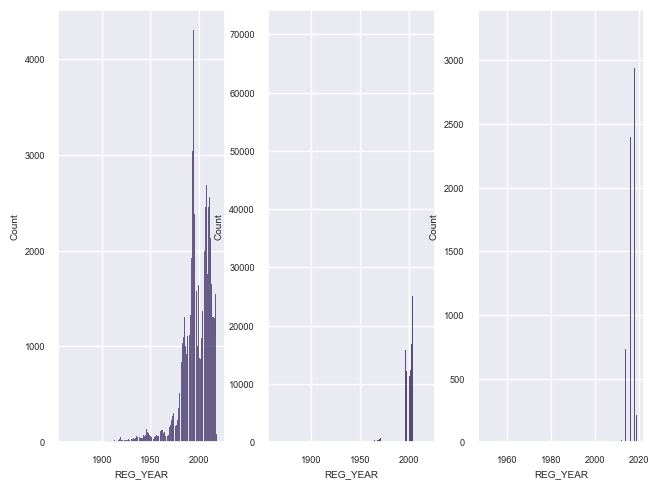

In [75]:
f, ax = plt.subplots(1, len(df["COMPANY_CLASS"].unique()))
f.tight_layout()
y=0
print(df["COMPANY_CLASS"].unique())
for x in df["COMPANY_CLASS"].unique():
    sns.histplot(x="REG_YEAR",
                data=df[df["COMPANY_CLASS"]==x],
                ax=ax[y])
    y+=1

India is seeing a increasing number of new companies being registered which a vast proportion of them being in the 2000s+
Solo COMPANY_CLASS catches traction post 2010+ from the first lower plot and can see appearing from 2014 in this sample space on the second rightmost plot.
The majority of companies are classified as Private (density of the first lower plot & count in second plot).

<AxesSubplot:xlabel='REG_YEAR', ylabel='PRINCIPAL_BUSINESS'>

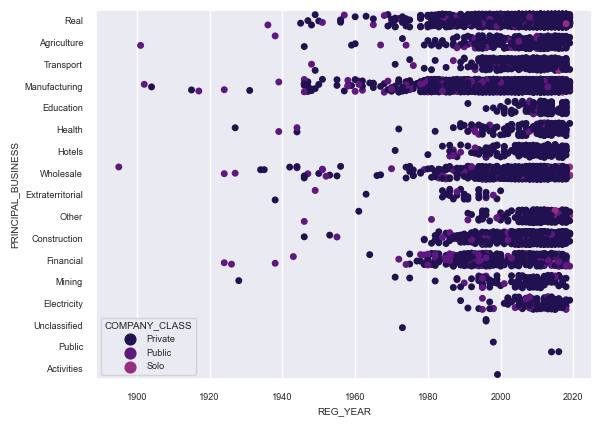

In [76]:
#Industry of companies

sns.stripplot(x="REG_YEAR",
              y="PRINCIPAL_BUSINESS",
              hue="COMPANY_CLASS",
              data=df_sample, jitter=0.3)

['Public' 'Private' 'Solo']


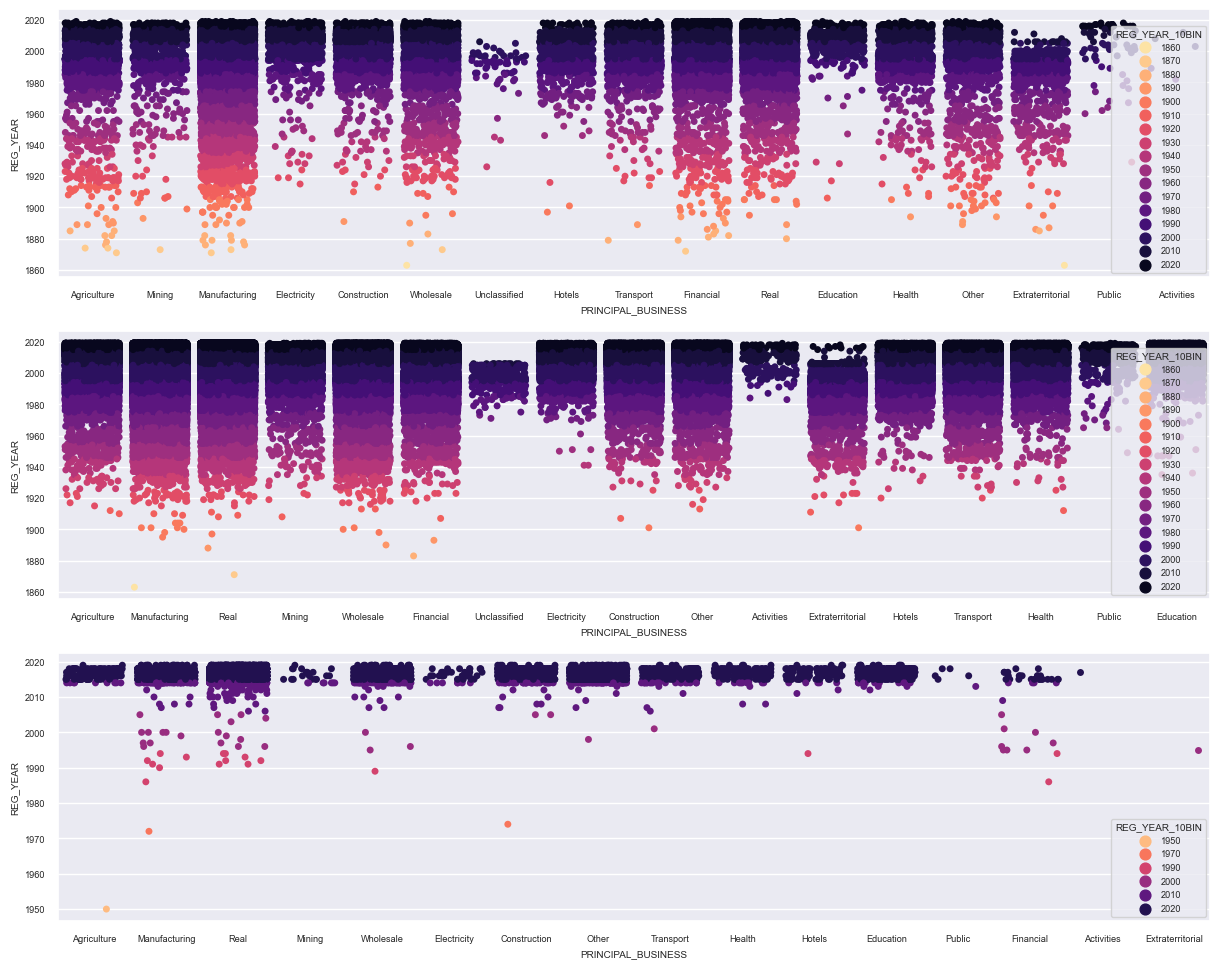

In [77]:
#Companies in respect to COMPANY_CLASS over time.
y=0
f, ax = plt.subplots(len(df["COMPANY_CLASS"].unique()),1)
f.subplots_adjust(top=1, bottom=-0.9, left=-0.9, hspace=0.2)
print(df["COMPANY_CLASS"].unique())
for x in df["COMPANY_CLASS"].unique():
    sns.stripplot(y="REG_YEAR",
                x="PRINCIPAL_BUSINESS",
                data=df[df["COMPANY_CLASS"]==x],
                hue="REG_YEAR_10BIN",
                palette="magma_r",
                jitter=0.4,
                ax=ax[y])
    y+=1

-Wholesale, Manufacturing and Real Estate have the highest number private companies.
-Public companies incline towards manufacturing followed by Real Estate and Financial sectors.
-Interesting how private companies have a big concentration in Real Estate even in the sparcity.
-Companies under Education and electricity industry started late in India and are relevant magnifications to look at.

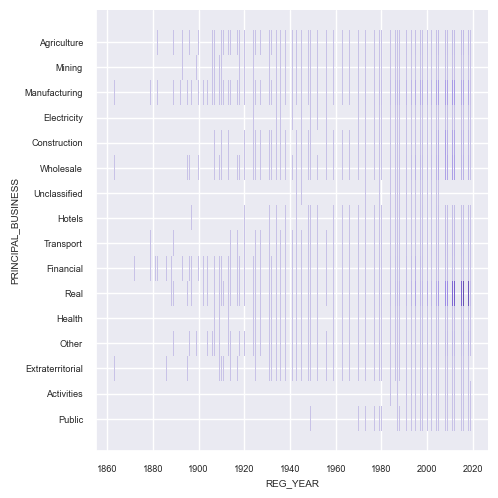

In [78]:
sns.displot(x="REG_YEAR", y="PRINCIPAL_BUSINESS", data=df[df["PRINCIPAL_BUSINESS"] != "Education"])

[Text(0, 0, 'Non-govt company'),
 Text(1, 0, 'Guarantee and Association comp'),
 Text(2, 0, 'Subsidiary of Foreign Company'),
 Text(3, 0, 'State Govt company'),
 Text(4, 0, 'Union Govt company')]

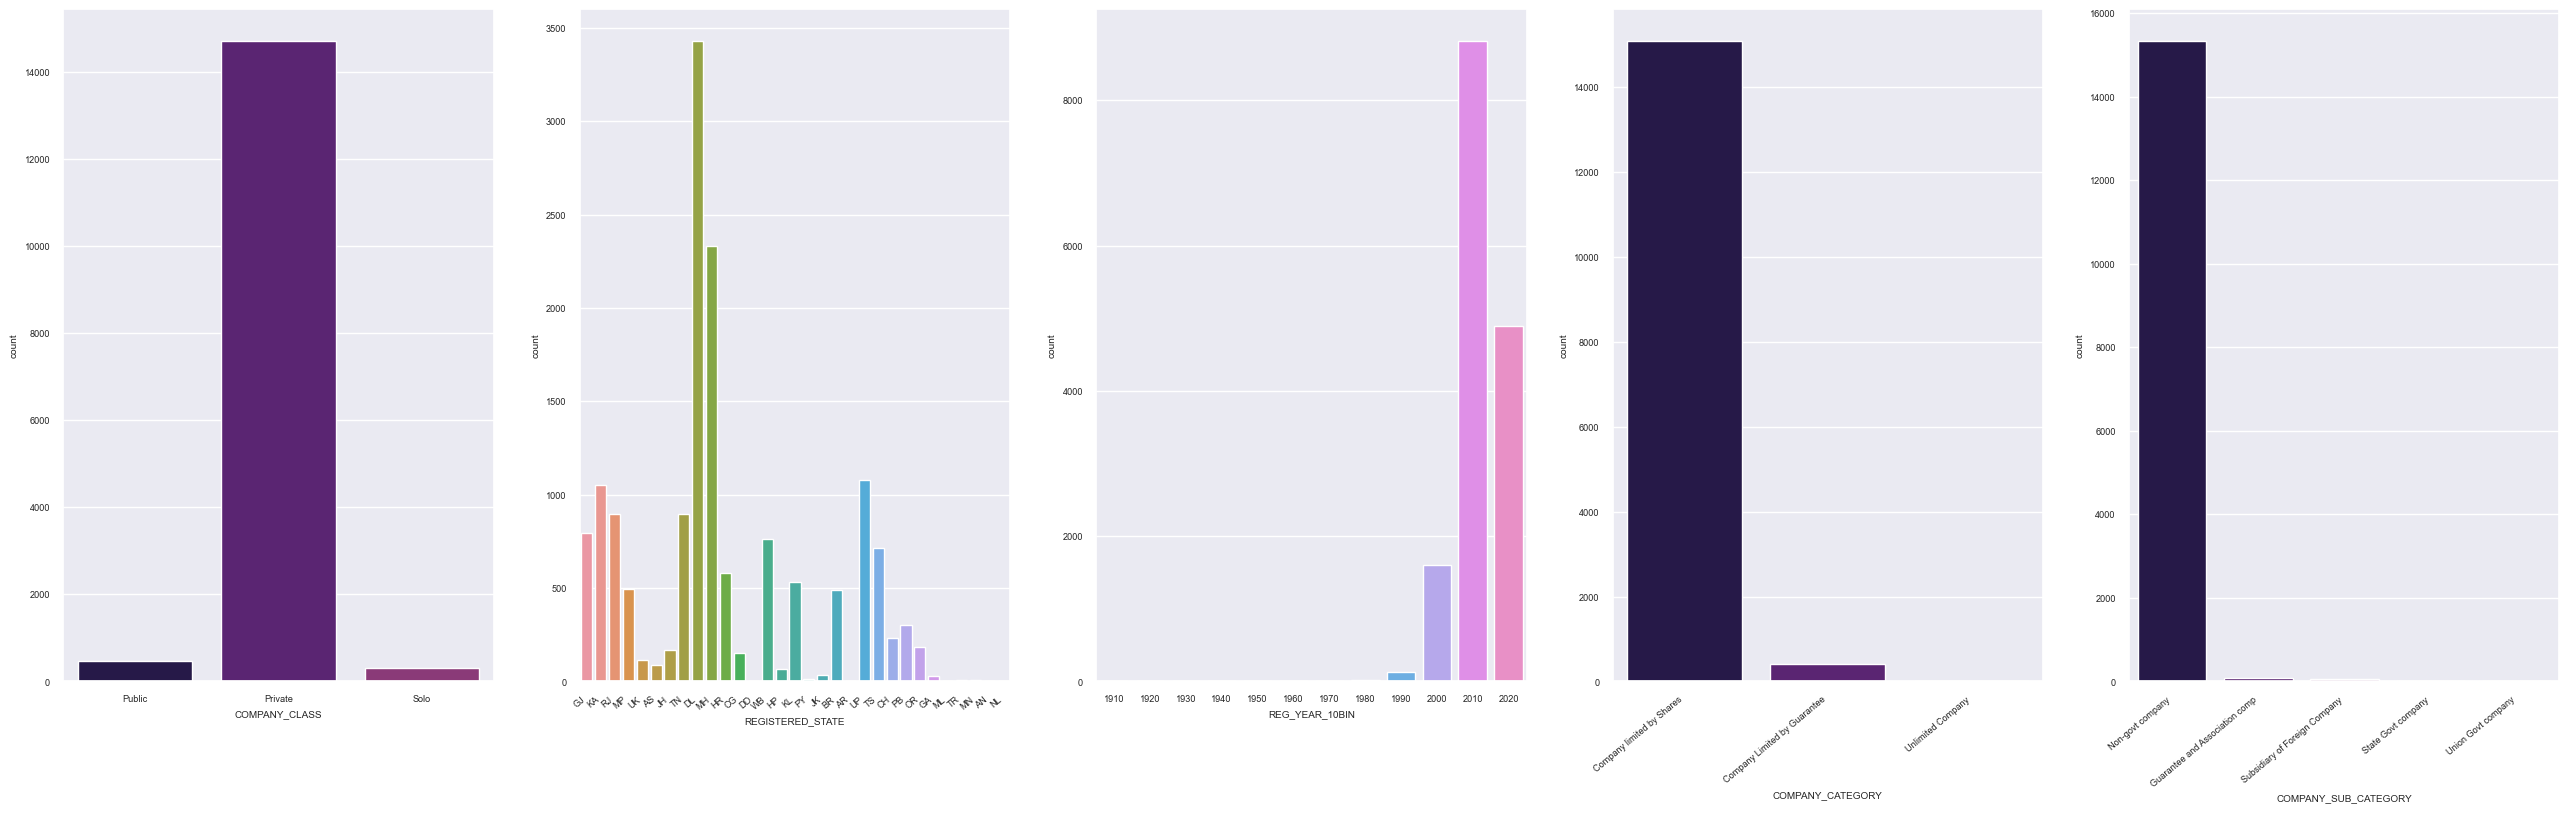

In [79]:
f, axes = plt.subplots(1,5)
f.subplots_adjust(top=0.5, bottom=-0.9, left=-3, hspace=0.2)
ax1 = sns.countplot(x="COMPANY_CLASS", data=df[df["PRINCIPAL_BUSINESS"] == "Education"], ax=axes[0])
ax2 = sns.countplot(x="REGISTERED_STATE", data=df[df["PRINCIPAL_BUSINESS"] == "Education"], ax=axes[1])
ax3 = sns.countplot(x="REG_YEAR_10BIN", data=df[df["PRINCIPAL_BUSINESS"] == "Education"], ax=axes[2])
ax4 = sns.countplot(x="COMPANY_CATEGORY", data=df[df["PRINCIPAL_BUSINESS"] == "Education"], ax=axes[3])
ax5 = sns.countplot(x="COMPANY_SUB_CATEGORY", data=df[df["PRINCIPAL_BUSINESS"] == "Education"], ax=axes[4])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")

In [80]:
df3 = df

In [81]:
df3.head()

COMPANY_NAME COMPANY_STATUS COMPANY_CLASS  \
70       AMRAWORLD AGRICO LIMITED              ACTV        Public   
71     TRANS TECHNO FOODS LIMITED              ULQD        Public   
72  GALAXY AGRICO EXPORTS LIMITED              ACTV        Public   
73   CHEMCRUX ENTERPRISES LIMITED              ACTV        Public   
74      JIYA ECO-PRODUCTS LIMITED              ACTV        Public   

             COMPANY_CATEGORY COMPANY_SUB_CATEGORY DATE_OF_REGISTRATION  \
70  Company limited by Shares     Non-govt company           1991-06-21   
71  Company limited by Shares     Non-govt company           1994-01-17   
72  Company limited by Shares     Non-govt company           1994-02-23   
73  Company limited by Shares     Non-govt company           1996-04-15   
74  Company limited by Shares     Non-govt company           2011-12-27   

   REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
70               GJ     130000000.0     120300000.0   
71               GJ     220000000.0     211200000.0   
72               GJ      55000000.0      27316200.0   
73               GJ      60000000.0      49362800.0   
74               GJ     320000000.0     300732620.0   

   PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
70                   Agriculture & allied   
71                   Agriculture & allied   
72                   Agriculture & allied   
73                   Agriculture & allied   
74                   Agriculture & allied   

                            REGISTERED_OFFICE_ADDRESS REGISTRAR_OF_COMPANIES  \
70  24, LAXMI CHAMBERS, NAVJEEVAN PRESS ROAD,OPP. ...          ROC AHMEDABAD   
71  B-2 SARITA DARSHAN OPP JAIHIND PRESSASHRAM ROAD            ROC AHMEDABAD   
72  236, Jai Kishan Industrial Estate,Behind Murli...          ROC AHMEDABAD   
73  330, TRIVIA Complex,Natubhai Circle, Racecourse            ROC AHMEDABAD   
74  SURVEY NO. 202/2/1, NAVAGAM (G),TALUKA VALLABH...          ROC AHMEDABAD   

   LATEST_YEAR_ANNUAL_RETURN PRINCIPAL_BUSINESS  REG_YEAR  REG_MONTH  \
70                31-03-2019        Agriculture      1991          6   
71                31-03-2009        Agriculture      1994          1   
72                31-03-2019        Agriculture      1994          2   
73                31-03-2019        Agriculture      1996          4   
74                31-03-2019        Agriculture      2011         12   

    REGISTRAR  REG_YEAR_5BIN  REG_YEAR_10BIN  REG_YEAR_20BIN  
70  AHMEDABAD           1990            1990            2000  
71  AHMEDABAD           1995            1990            2000  
72  AHMEDABAD           1995            1990            2000  
73  AHMEDABAD           1995            2000            2000  
74  AHMEDABAD           2010            2010            2020

In [82]:
df3.drop(['LATEST_YEAR_ANNUAL_RETURN','REGISTERED_OFFICE_ADDRESS','COMPANY_NAME','DATE_OF_REGISTRATION'],axis=1,inplace=True)

In [83]:
df3.drop(['REGISTRAR_OF_COMPANIES','PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','REGISTRAR_OF_COMPANIES'],axis=1,inplace=True)

In [84]:
df3.head()

COMPANY_STATUS COMPANY_CLASS           COMPANY_CATEGORY  \
70           ACTV        Public  Company limited by Shares   
71           ULQD        Public  Company limited by Shares   
72           ACTV        Public  Company limited by Shares   
73           ACTV        Public  Company limited by Shares   
74           ACTV        Public  Company limited by Shares   

   COMPANY_SUB_CATEGORY REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
70     Non-govt company               GJ     130000000.0     120300000.0   
71     Non-govt company               GJ     220000000.0     211200000.0   
72     Non-govt company               GJ      55000000.0      27316200.0   
73     Non-govt company               GJ      60000000.0      49362800.0   
74     Non-govt company               GJ     320000000.0     300732620.0   

   PRINCIPAL_BUSINESS  REG_YEAR  REG_MONTH  REGISTRAR  REG_YEAR_5BIN  \
70        Agriculture      1991          6  AHMEDABAD           1990   
71        Agriculture      1994          1  AHMEDABAD           1995   
72        Agriculture      1994          2  AHMEDABAD           1995   
73        Agriculture      1996          4  AHMEDABAD           1995   
74        Agriculture      2011         12  AHMEDABAD           2010   

    REG_YEAR_10BIN  REG_YEAR_20BIN  
70            1990            2000  
71            1990            2000  
72            1990            2000  
73            2000            2000  
74            2010            2020

In [85]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df3['COMPANY_STATUS']= label_encoder.fit_transform(df3['COMPANY_STATUS'])
df3['COMPANY_CLASS']= label_encoder.fit_transform(df3['COMPANY_CLASS'])
df3['COMPANY_CATEGORY']= label_encoder.fit_transform(df3['COMPANY_CATEGORY'])
df3['COMPANY_SUB_CATEGORY']= label_encoder.fit_transform(df3['COMPANY_SUB_CATEGORY'])
df3['REGISTERED_STATE']= label_encoder.fit_transform(df3['REGISTERED_STATE'])
df3['REGISTRAR']= label_encoder.fit_transform(df3['REGISTRAR'])
df3['PRINCIPAL_BUSINESS']= label_encoder.fit_transform(df3['PRINCIPAL_BUSINESS'])



  


In [86]:
df3_sample = df3.sample(n=10000)

In [72]:
corr = df3_sample.corr()

<AxesSubplot:>

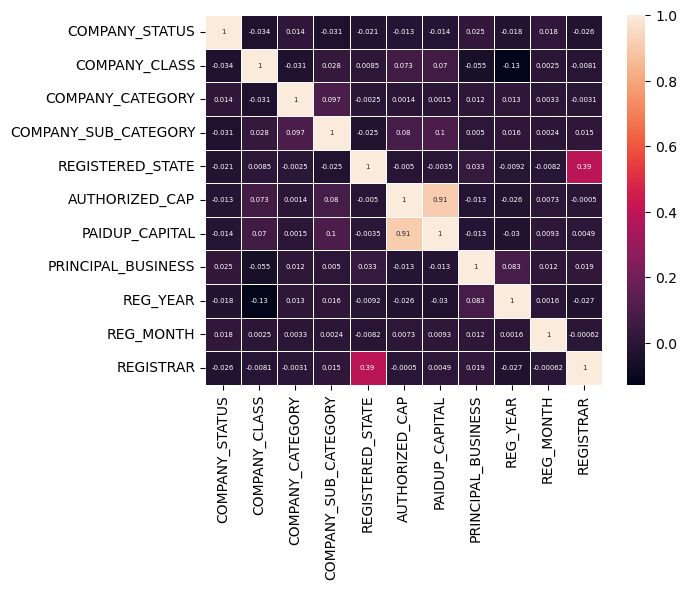

In [61]:
sns.heatmap(corr, linewidths = 0.50,annot = True,annot_kws={'size': 5})

In [57]:
df_save=df

In [64]:
df_save.to_csv('file1.csv')

In [62]:
state_codes = {"GJ":'Gujarat','KA':'Karnataka','RJ':'Rajasthan','MP':'Madhya Pradesh',
       'UK':'Uttaranchal', 'AS':'Assam', 'JH':'Jharkhand', 'TN':'Tamil Nadu', 'DL':'Delhi',
       'MH':'Maharashtra', 'HR':'Haryana', 'CG':'Chattisgarh', 'DD':'Daman and Diu',
       'WB':'West Bengal', 'LD':'Lakshadweep', 'HP':'Himachal Pradesh',
       'DH':'Dadra and Nagra Haveli', 'KL':'Kerala', 'PY':'Pondicherry',
       'JK':'Jammu and Kashmir', 'BR':'Bihar', 'AP':'Andhra Pradesh',
       'AR':'Arunachal Pradesh', 'UP':'Uttar Pradesh', 'TS':'Telangana', 'CH':'Chandigarh',
       'PB':'Punjab', 'OR':'Orissa', 'GA':'Goa', 'ML':'Meghalaya', 'TR':'Tripura', 'SK':'Sikkim',
       'MZ':'Mizoram', 'MN':'Manipur', 'AN':'Andaman and Nicobar Islands', 'NL':'Nagaland'}
df_save.replace({'REGISTERED_STATE':state_codes}, inplace=True)

In [63]:
df_save.head()

COMPANY_NAME COMPANY_STATUS COMPANY_CLASS  \
70       AMRAWORLD AGRICO LIMITED              ACTV        Public   
71     TRANS TECHNO FOODS LIMITED              ULQD        Public   
72  GALAXY AGRICO EXPORTS LIMITED              ACTV        Public   
73   CHEMCRUX ENTERPRISES LIMITED              ACTV        Public   
74      JIYA ECO-PRODUCTS LIMITED              ACTV        Public   

             COMPANY_CATEGORY COMPANY_SUB_CATEGORY DATE_OF_REGISTRATION  \
70  Company limited by Shares     Non-govt company           1991-06-21   
71  Company limited by Shares     Non-govt company           1994-01-17   
72  Company limited by Shares     Non-govt company           1994-02-23   
73  Company limited by Shares     Non-govt company           1996-04-15   
74  Company limited by Shares     Non-govt company           2011-12-27   

   REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
70          Gujarat     130000000.0     120300000.0   
71          Gujarat     220000000.0     211200000.0   
72          Gujarat      55000000.0      27316200.0   
73          Gujarat      60000000.0      49362800.0   
74          Gujarat     320000000.0     300732620.0   

   PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
70                   Agriculture & allied   
71                   Agriculture & allied   
72                   Agriculture & allied   
73                   Agriculture & allied   
74                   Agriculture & allied   

                            REGISTERED_OFFICE_ADDRESS REGISTRAR_OF_COMPANIES  \
70  24, LAXMI CHAMBERS, NAVJEEVAN PRESS ROAD,OPP. ...          ROC AHMEDABAD   
71  B-2 SARITA DARSHAN OPP JAIHIND PRESSASHRAM ROAD            ROC AHMEDABAD   
72  236, Jai Kishan Industrial Estate,Behind Murli...          ROC AHMEDABAD   
73  330, TRIVIA Complex,Natubhai Circle, Racecourse            ROC AHMEDABAD   
74  SURVEY NO. 202/2/1, NAVAGAM (G),TALUKA VALLABH...          ROC AHMEDABAD   

   LATEST_YEAR_ANNUAL_RETURN PRINCIPAL_BUSINESS  REG_YEAR  REG_MONTH  \
70                31-03-2019        Agriculture      1991          6   
71                31-03-2009        Agriculture      1994          1   
72                31-03-2019        Agriculture      1994          2   
73                31-03-2019        Agriculture      1996          4   
74                31-03-2019        Agriculture      2011         12   

    REGISTRAR  REG_YEAR_5BIN  REG_YEAR_10BIN  REG_YEAR_20BIN  
70  AHMEDABAD           1990            1990            2000  
71  AHMEDABAD           1995            1990            2000  
72  AHMEDABAD           1995            1990            2000  
73  AHMEDABAD           1995            2000            2000  
74  AHMEDABAD           2010            2010            2020